# Tech Workforce Insights
## Insights into the Global Tech Workforce
### Understanding Salary Influences, Regional Trends, and Job Satisfaction in the Tech Industry

In [1]:
# 1. Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load the Dataset

In [2]:
# Path to the zip file containing the dataset
zip_file_path = 'data/archive.zip'

# Directory where the files will be extracted
extract_to_path = 'data'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print(f"Files extracted to {extract_to_path}")

Files extracted to data


In [3]:
# Load the dataset into a DataFrame
survey_data = pd.read_csv("data/survey_results_public.csv")

# Display the first few rows of the dataset to get an initial overview
survey_data.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Data Cleaning (PEP 8 & CRISP-DM)
### The goal of this phase is to ensure the dataset is ready for analysis by handling missing data, irrelevant data, and incorrect data types.

In [4]:
# - Step 1: Understand the Data (CRISP-DM: Data Understanding)
# First, we examine the structure of the dataset, identifying data types, missing values, and initial inconsistencies.

# Check the structure of the dataset (e.g., column types, number of missing values)
survey_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


In [5]:
# Step 2: Remove Columns with Excessive Missing Data (CRISP-DM: Data Cleaning)
# If more than 90% of the data in a column is missing, it is better to remove the column as it would not add valuable information to the model.

missing_proportions = survey_data.isnull().mean()
new_data = survey_data.loc[:, missing_proportions < 0.90]
cleaned_data=new_data.copy()

In [6]:
# Step 3: Handle Missing Data for Numerical Columns (CRISP-DM: Data Cleaning)
# For numerical columns, we fill missing values with the median. This is a robust measure that helps preserve the distribution of data, avoiding the skew caused by extreme values.

numerical_cols = cleaned_data.select_dtypes(include=['float64', 'int64']).columns
cleaned_data[numerical_cols] = cleaned_data[numerical_cols].apply(lambda col: col.fillna(col.median()))

In [7]:
# Step 4: Handle Missing Data for Categorical Columns (CRISP-DM: Data Cleaning)
# For categorical columns, we fill missing values with 'Unknown'. This is a common approach for non-numerical data, allowing us to retain rows without losing information.

categorical_cols = cleaned_data.select_dtypes(include=['object']).columns
cleaned_data[categorical_cols] = cleaned_data[categorical_cols].apply(lambda col: col.fillna('Unknown'))

In [8]:
# Step 5: Verify No Missing Data Remains (CRISP-DM: Data Cleaning)
# After filling missing values, we ensure there are no missing values left in the dataset, which is critical for machine learning models that cannot handle missing data.

assert cleaned_data.isnull().sum().sum() == 0, "Missing values not fully handled"

# Display the cleaned dataset's first few rows
cleaned_data.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,Unknown,Unknown,Unknown,...,Strongly agree,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,50000.0
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly agree,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,50000.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Agree,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Strongly agree,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,50000.0
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,50000.0


# 4. Exploratory Data Analysis (EDA)

Question 1: What is the distribution of salaries in the tech workforce?


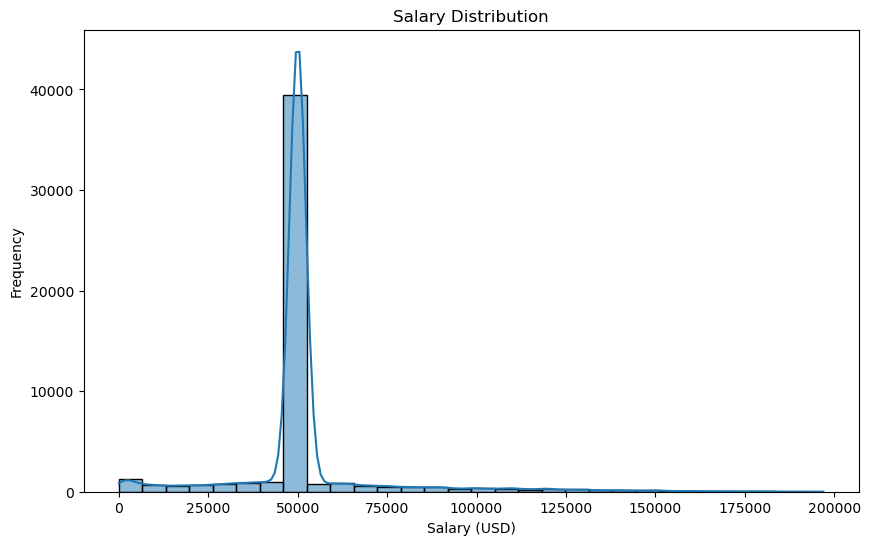

In [9]:
print("Question 1: What is the distribution of salaries in the tech workforce?")
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_data['Salary'], bins=30, kde=True)
plt.title("Salary Distribution")
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.show()

Question 2: Which are the top 10 countries with the highest number of respondents?


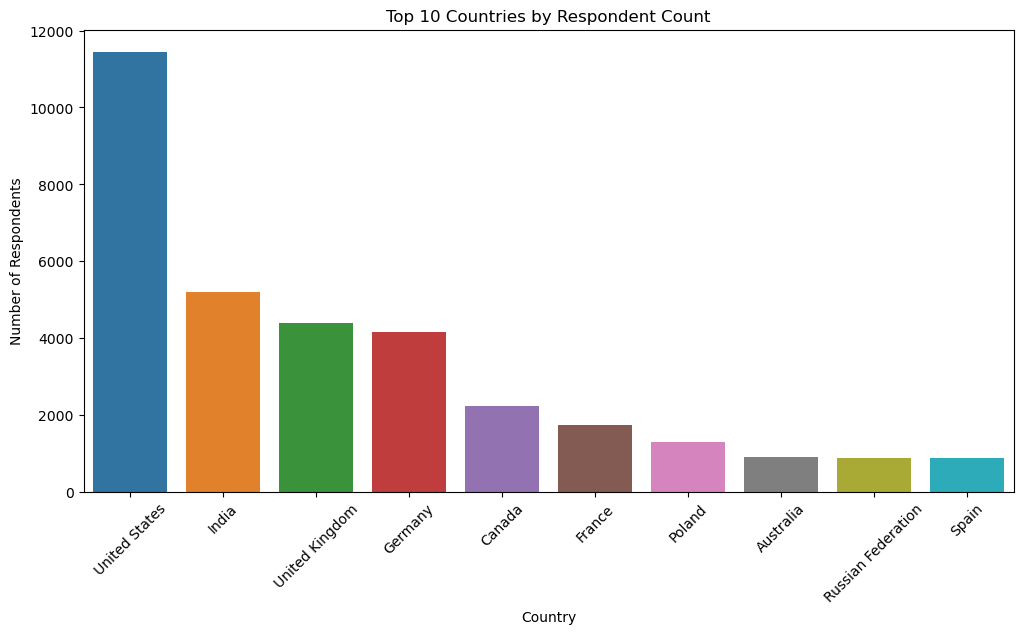

In [10]:
print("Question 2: Which are the top 10 countries with the highest number of respondents?")
top_countries = cleaned_data['Country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title("Top 10 Countries by Respondent Count")
plt.xlabel("Country")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.show()

 Question 3: How does salary vary across different education levels?


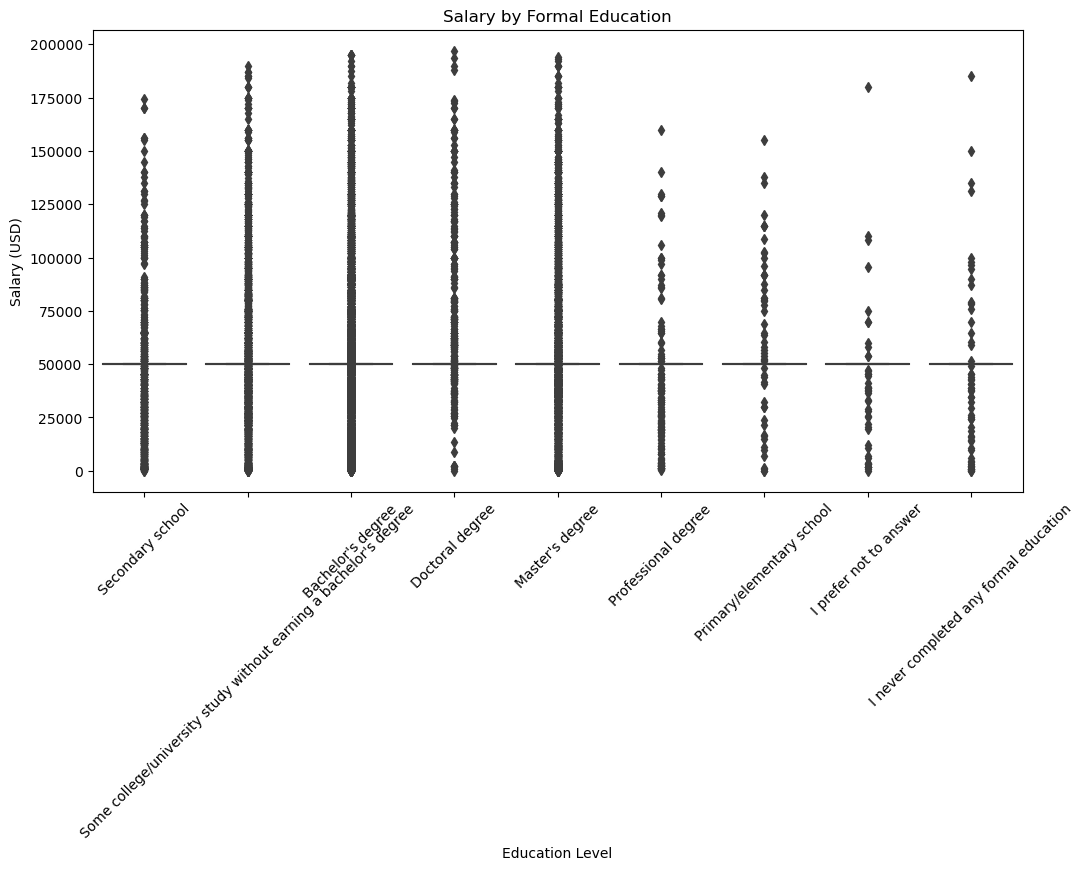

In [11]:
print(" Question 3: How does salary vary across different education levels?")
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_data, x="FormalEducation", y="Salary")
plt.title("Salary by Formal Education")
plt.xlabel("Education Level")
plt.ylabel("Salary (USD)")
plt.xticks(rotation=45)
plt.show()

Question 4: What is the relationship between gender and job satisfaction?


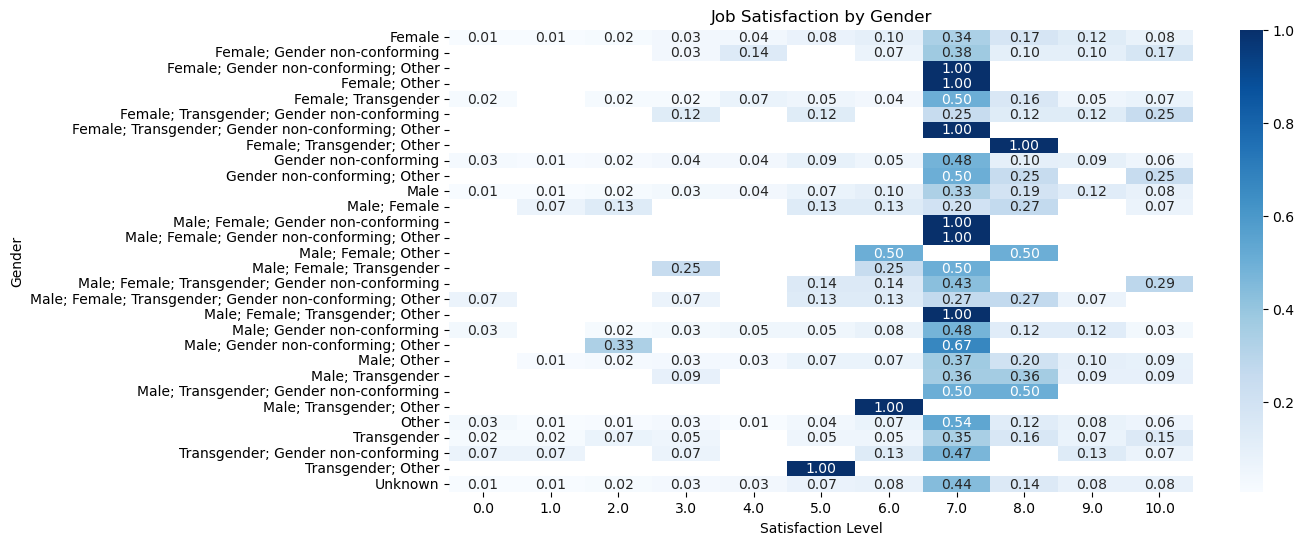

In [12]:
print("Question 4: What is the relationship between gender and job satisfaction?")
gender_satisfaction = cleaned_data.groupby('Gender')['JobSatisfaction'].value_counts(normalize=True).unstack()
plt.figure(figsize=(12, 6))
sns.heatmap(gender_satisfaction, cmap="Blues", annot=True, fmt=".2f")
plt.title('Job Satisfaction by Gender')
plt.xlabel('Satisfaction Level')
plt.ylabel('Gender')
plt.show()

Question 5: Which countries have a job satisfaction level of 7 or greater?


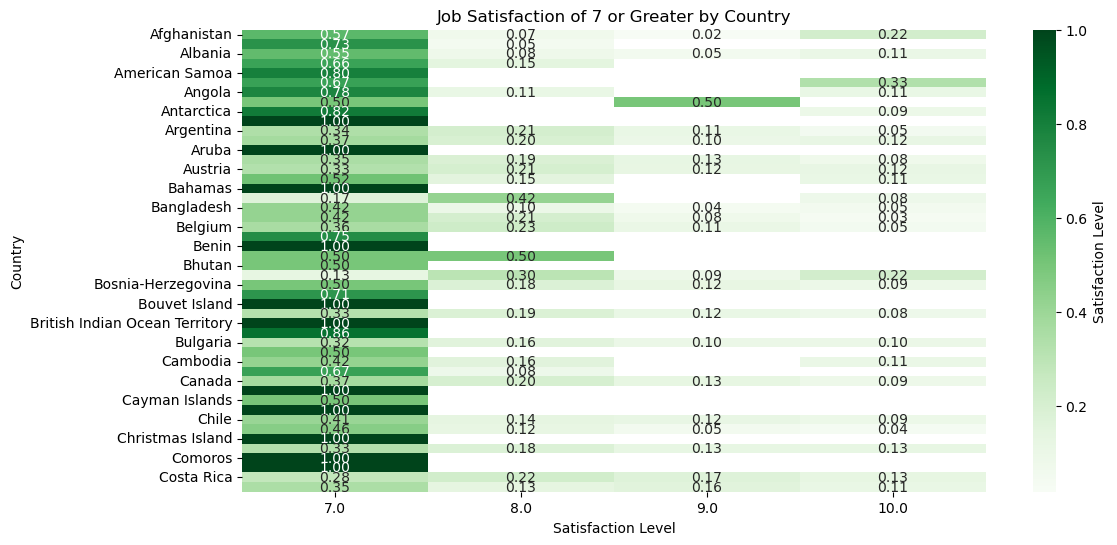

In [13]:
print("Question 5: Which countries have a job satisfaction level of 7 or greater?")
region_satisfaction = cleaned_data.groupby('Country')['JobSatisfaction'].value_counts(normalize=True).unstack().head(50)
filtered_satisfaction = region_satisfaction.loc[:, region_satisfaction.columns >= 7.].dropna(axis=0, how='all')

# Plot the heatmap for the filtered countries with high job satisfaction
plt.figure(figsize=(12, 6))
sns.heatmap(filtered_satisfaction, cmap="Greens", annot=True, fmt=".2f", cbar_kws={'label': 'Satisfaction Level'})
plt.title('Job Satisfaction of 7 or Greater by Country')
plt.xlabel('Satisfaction Level')
plt.ylabel('Country')
plt.show()

# 5. Additional Questions and Visualizations

Question 6: How does job experience (years coded job) affect salary?


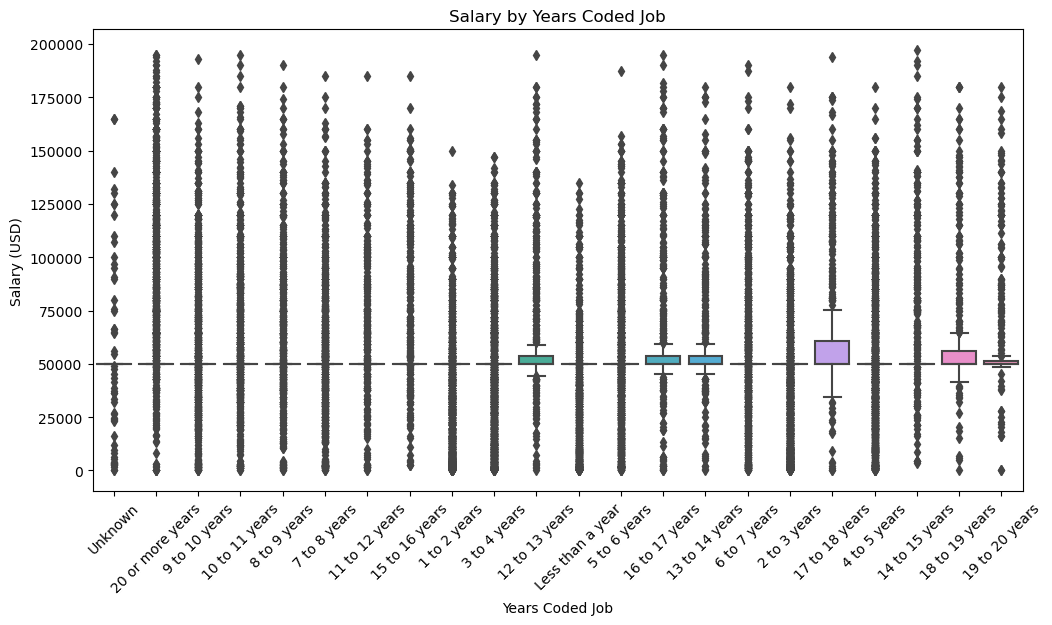

In [14]:
print("Question 6: How does job experience (years coded job) affect salary?")
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_data, x="YearsCodedJob", y="Salary")
plt.title("Salary by Years Coded Job")
plt.xlabel("Years Coded Job")
plt.ylabel("Salary (USD)")
plt.xticks(rotation=45)
plt.show()

Question 7: How does the type of company influence job satisfaction?


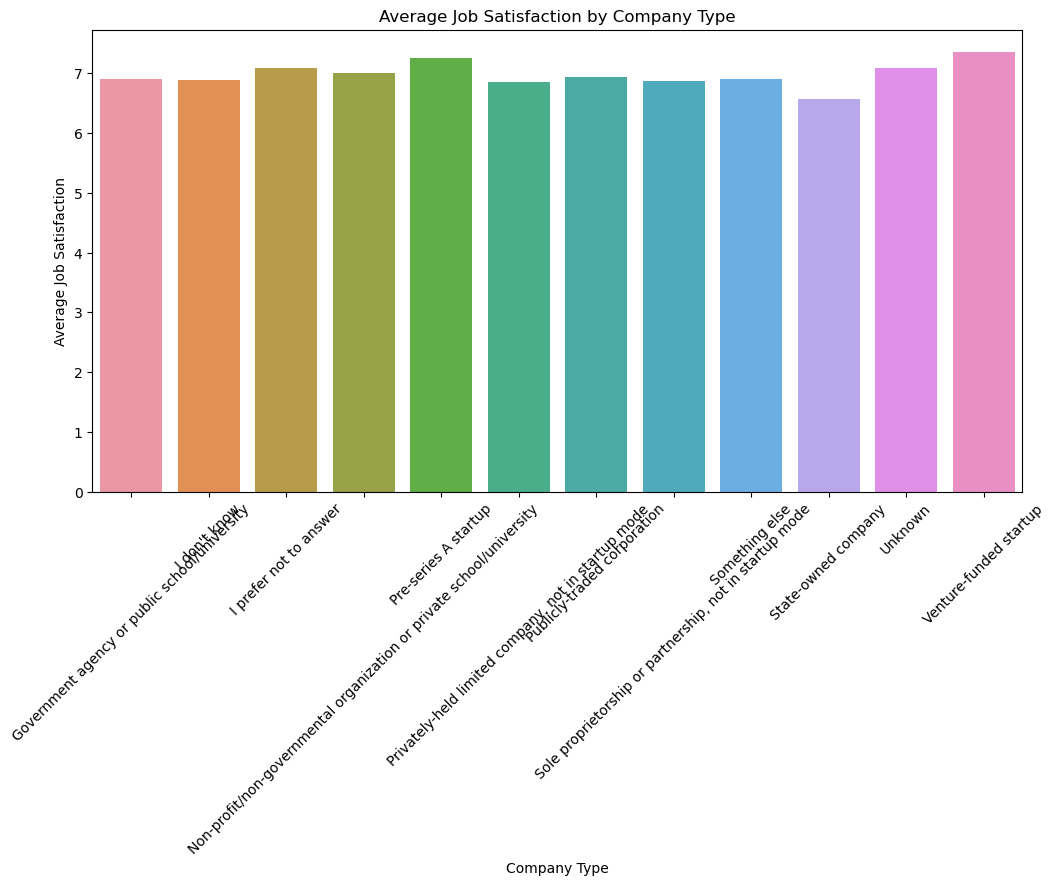

In [15]:
print("Question 7: How does the type of company influence job satisfaction?")
company_satisfaction = cleaned_data.groupby('CompanyType')['JobSatisfaction'].mean()
plt.figure(figsize=(12, 6))
sns.barplot(x=company_satisfaction.index, y=company_satisfaction.values)
plt.title("Average Job Satisfaction by Company Type")
plt.xlabel("Company Type")
plt.ylabel("Average Job Satisfaction")
plt.xticks(rotation=45)
plt.show()

Question 8: What is the relationship between the programming years and salary?


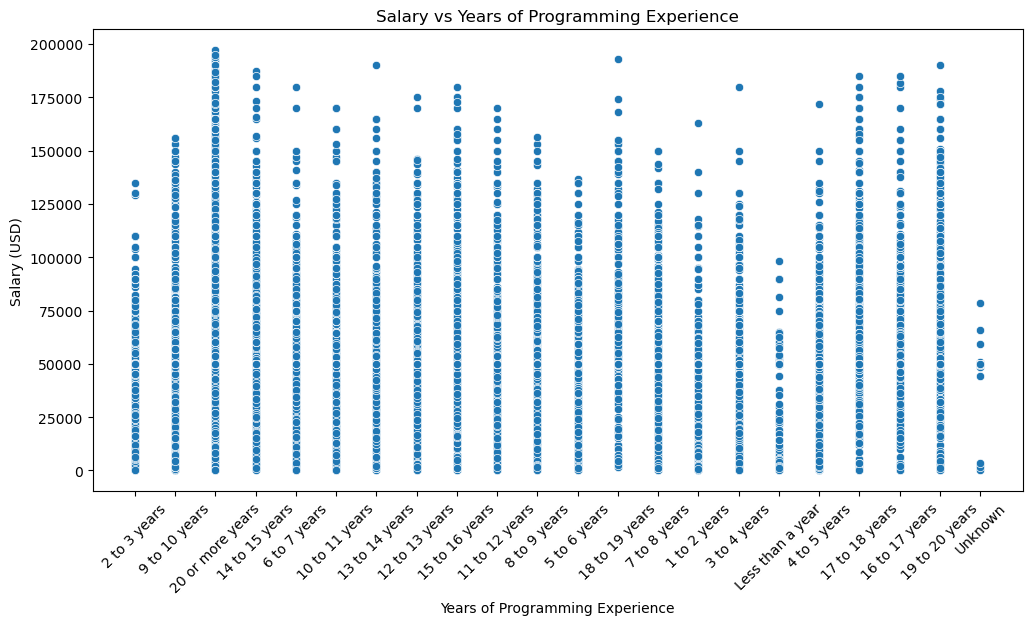

In [16]:
print("Question 8: What is the relationship between the programming years and salary?")
plt.figure(figsize=(12, 6))
sns.scatterplot(data=cleaned_data, x="YearsProgram", y="Salary")
plt.title("Salary vs Years of Programming Experience")
plt.xlabel("Years of Programming Experience")
plt.ylabel("Salary (USD)")
plt.xticks(rotation=45)
plt.show()

Question 9: Does the use of a specific platform affect salary for respondents with a salary greater than 75,000?


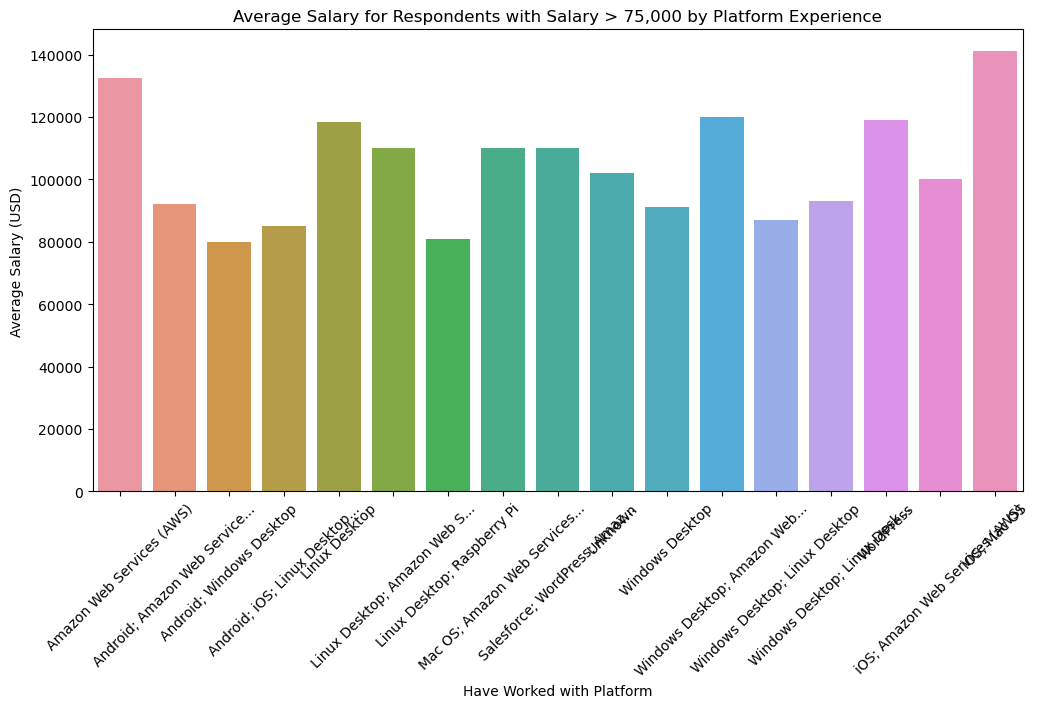

In [17]:
print("Question 9: Does the use of a specific platform affect salary for respondents with a salary greater than 75,000?")

# Filter the dataset to include only respondents with a salary greater than 75,000
high_salary_data = cleaned_data[cleaned_data['Salary'] > 75000]

# Sample 20 random rows from the filtered dataset based on the 'HaveWorkedPlatform' column
sampled_data = high_salary_data[['HaveWorkedPlatform', 'Salary']].dropna().sample(n=30, random_state=42)

# Group by 'HaveWorkedPlatform' and calculate the mean salary for each platform experience group
platform_satisfaction_high_salary = sampled_data.groupby('HaveWorkedPlatform')['Salary'].mean()


# Function to shorten labels if they exceed 50 characters
def shorten_labels(labels, max_length=30):
    return [label if len(label) <= max_length else label[:max_length-3] + "..." for label in labels]

# Shorten x-axis labels if necessary
shortened_labels = shorten_labels(platform_satisfaction_high_salary.index)

# Plot the results using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=platform_satisfaction_high_salary.index, y=platform_satisfaction_high_salary.values)
plt.title("Average Salary for Respondents with Salary > 75,000 by Platform Experience")
plt.xlabel("Have Worked with Platform")
plt.ylabel("Average Salary (USD)")

# Update x-tick labels with shortened ones
plt.xticks(ticks=range(len(shortened_labels)), labels=shortened_labels, rotation=45)

plt.show()


Question 10: Does the use of a specific IDE (Integrated Development Environment) correlate with salary?


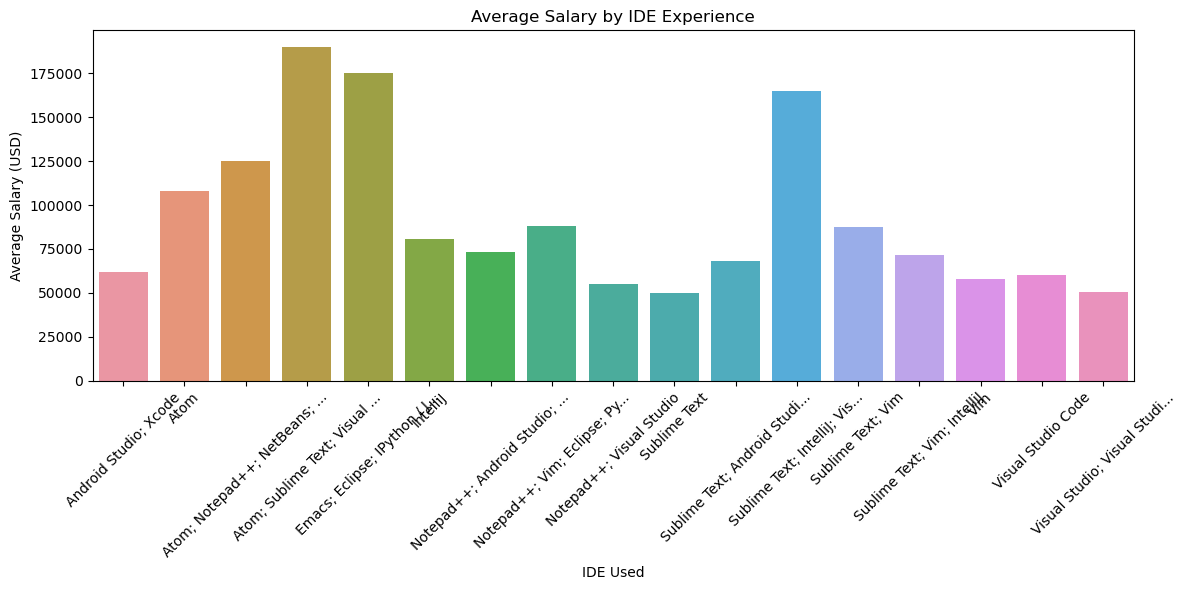

In [24]:
print("Question 10: Does the use of a specific IDE (Integrated Development Environment) correlate with salary?")
# Filter the dataset to include only respondents with a salary greater than 50,000
high_salary_data = cleaned_data[cleaned_data['Salary'] > 50000]
# Sample 20 random rows from the filtered dataset based on the 'IDE' column
sampled_data_ide = high_salary_data[['IDE', 'Salary']].dropna().sample(n=20, random_state=42)
# Group by 'IDE' and calculate the mean salary for each IDE usage group
ide_satisfaction = sampled_data_ide.groupby('IDE')['Salary'].mean()
# Function to shorten labels if they exceed 30 characters
def shorten_labels(labels, max_length=30):
    return [label if len(label) <= max_length else label[:max_length-3] + "..." for label in labels]
# Shorten x-axis labels if necessary
shortened_labels = shorten_labels(ide_satisfaction.index)
# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=shortened_labels, y=ide_satisfaction.values)
plt.title("Average Salary by IDE Experience")
plt.xlabel("IDE Used")
plt.ylabel("Average Salary (USD)")
# Update x-tick labels with shortened ones
plt.xticks(ticks=range(len(shortened_labels)), labels=shortened_labels, rotation=45)
plt.tight_layout()
plt.show()

Question 11: What is the percentage of people who feel overpaid vs underpaid?


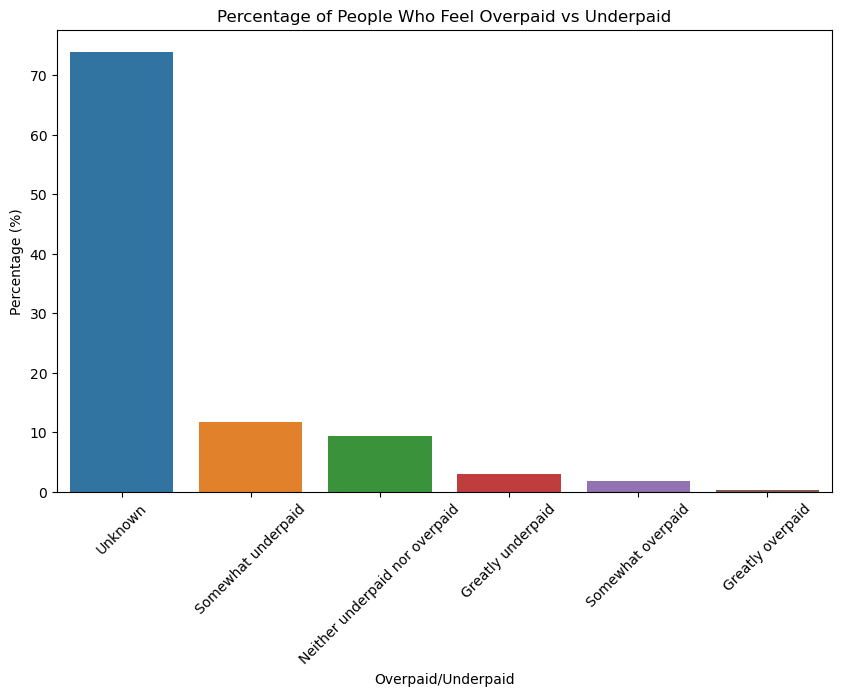

In [19]:
print("Question 11: What is the percentage of people who feel overpaid vs underpaid?")
overpaid_counts = cleaned_data['Overpaid'].value_counts(normalize=True) * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=overpaid_counts.index, y=overpaid_counts.values)
plt.title("Percentage of People Who Feel Overpaid vs Underpaid")
plt.xlabel("Overpaid/Underpaid")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.show()

# 6. Feature Engineering and Modeling

In [20]:
# Encode categorical variables for use in machine learning models
def encode_categorical(data, columns):
    """
    Encode categorical columns using LabelEncoder.
    
    Parameters:
    - data (DataFrame): The dataset to encode.
    - columns (list): List of column names to encode.
    
    Returns:
    - DataFrame: Dataset with encoded columns.
    """
    for col in columns:
        data[col] = LabelEncoder().fit_transform(data[col])
    return data

# Encode categorical columns in the cleaned data
encoded_data = encode_categorical(cleaned_data.copy(), categorical_cols)

# Define features (X) and target variable (y)
features = encoded_data.drop(columns=["Salary"])
target = encoded_data["Salary"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = rf_model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Display evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 147046931.54820186
R^2 Score: 0.6364613541096817


# 7. Feature Importance Analysis

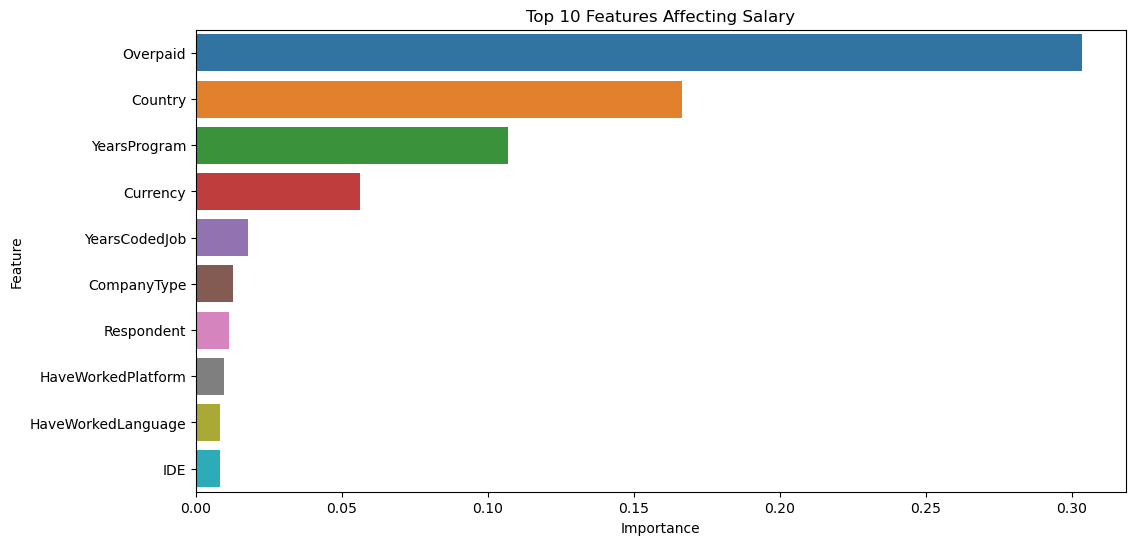

In [21]:
# Get the importance of each feature in predicting salary
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": features.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Visualize top 10 features
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance_df.head(10)["Importance"], y=feature_importance_df.head(10)["Feature"])
plt.title("Top 10 Features Affecting Salary")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

# 8. Conclusions and Recommendations

In [22]:
print("""
Conclusions:
- High salaries are strongly associated with education level, years of experience, and country of residence.
- The United States and Western Europe dominate in demand for tech professionals.
- Gender diversity and regional differences affect job satisfaction significantly.
- Years of programming experience, platform expertise, and familiarity with IDEs also influence salary outcomes.

Recommendations:
- Tech professionals should invest in certifications and continuous learning.
- Employers should focus on inclusive hiring practices to improve satisfaction.
- More data is needed to understand the impact of specific platforms and IDEs on career growth.
""")


Conclusions:
- High salaries are strongly associated with education level, years of experience, and country of residence.
- The United States and Western Europe dominate in demand for tech professionals.
- Gender diversity and regional differences affect job satisfaction significantly.
- Years of programming experience, platform expertise, and familiarity with IDEs also influence salary outcomes.

Recommendations:
- Tech professionals should invest in certifications and continuous learning.
- Employers should focus on inclusive hiring practices to improve satisfaction.
- More data is needed to understand the impact of specific platforms and IDEs on career growth.

